- DANN
- kd-tree
- LSH

# 1. Imports

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# 2. Data
## 2.1. Data Import

In [5]:
data = pd.read_csv('../data/chips.txt')
data.head()

,x,y,cls
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [6]:
data['cls'].value_counts()

0    60
1    58
Name: cls, dtype: int64

In [7]:
X = data[['x', 'y']]
y = data['cls']

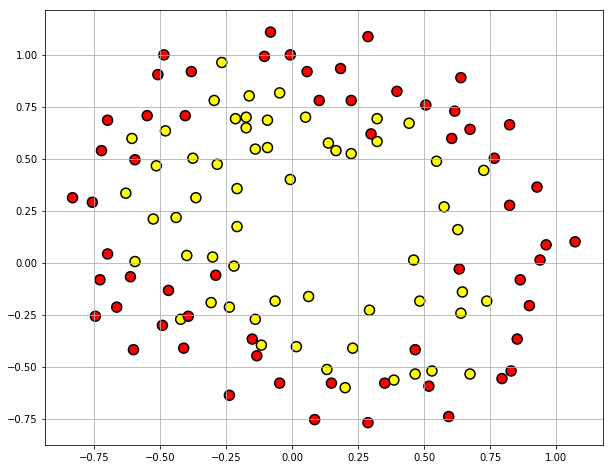

In [8]:
# Look at the data
plt.figure(figsize=(10, 8))
plot_row = plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=100,
                       cmap='autumn', edgecolors='black', linewidth=1.5)
plt.grid();

## 2.2. Train/test split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=112358)

In [10]:
X_train.shape
X_test.shape

y_train.shape
y_test.shape

(94, 2)

(24, 2)

(94,)

(24,)

# 3. Modeling
## 3.1. Sklearn-Knn

In [11]:
cls_knn_sk = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

In [12]:
cls_knn_sk.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
cls_knn_sk.predict(X_test)

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1])

In [14]:
cls_knn_sk.predict_proba(X_test)[:10]

array([[0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0.4, 0.6],
       [0. , 1. ],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.6, 0.4]])

In [15]:
cls_knn_sk.score(X_train, y_train)
cls_knn_sk.score(X_test, y_test)

0.8404255319148937

0.75

In [16]:
f1_score(y_train, cls_knn_sk.predict(X_train))
f1_score(y_test, cls_knn_sk.predict(X_test))

0.8598130841121495

0.6666666666666666

## 3.2. My KnnClassifier

In [11]:
from os import getcwd
from sys import path

path.append(getcwd())

In [12]:
from KnnClassifier import KnnClassifier

In [13]:
cls_knn_my = KnnClassifier(n_neighbors=5, scaler=None, 
                          kernel='kernel_gauss', h=-1,
                          metric='minkowski', p=2)

In [14]:
cls_knn_my._get_param_names()
cls_knn_my.get_params()
cls_knn_my.set_params(scaler = 'MinMaxScaler')
cls_knn_my._estimator_type

['h', 'kernel', 'metric', 'n_neighbors', 'p', 'scaler', 'weights']

{'h': -1,
 'kernel': 'kernel_gauss',
 'metric': 'minkowski',
 'n_neighbors': 5,
 'p': 2,
 'scaler': None,
 'weights': 'uniform'}

KnnClassifier(h=-1, kernel='kernel_gauss', metric='minkowski', n_neighbors=5,
       p=2, scaler='MinMaxScaler', weights='uniform')

'classifier'

In [17]:
cls_knn_my.fit(X_train, y_train)

In [18]:
cls_knn_my._fit_X

array([[ 0.46601  , -0.41886  ],
       [-0.72638  , -0.082602 ],
       [-0.17339  ,  0.69956  ],
       [ 0.67339  , -0.53582  ],
       [-0.092742 ,  0.55336  ],
       [ 0.28744  ,  1.087    ],
       [ 0.16647  ,  0.53874  ],
       [ 0.82316  ,  0.66301  ],
       [-0.59389  ,  0.49488  ],
       [-0.54781  ,  0.70687  ],
       [-0.06394  , -0.18494  ],
       [ 0.63882  , -0.24342  ],
       [-0.28859  , -0.060673 ],
       [ 0.322    ,  0.5826   ],
       [-0.21371  ,  0.69225  ],
       [-0.52477  ,  0.2098   ],
       [ 0.51786  , -0.5943   ],
       [ 0.13191  , -0.51389  ],
       [ 0.76555  ,  0.50219  ],
       [-0.13882  ,  0.54605  ],
       [-0.10426  ,  0.99196  ],
       [ 0.38537  , -0.56506  ],
       [-0.43836  ,  0.21711  ],
       [ 0.86348  , -0.082602 ],
       [-0.11578  , -0.39693  ],
       [ 0.46601  , -0.53582  ],
       [-0.4038   ,  0.70687  ],
       [ 0.54666  ,  0.48757  ],
       [ 0.59274  , -0.7405   ],
       [-0.20795  ,  0.35599  ],
       [-0

In [19]:
cls_knn_my._predict(X_test)

array([[0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.55277315, 0.44722685],
       [0.42514466, 0.57485534],
       [0.        , 1.        ],
       [0.58660393, 0.41339607],
       [0.64016561, 0.35983439],
       [0.62777015, 0.37222985],
       [0.61984393, 0.38015607],
       [0.        , 1.        ],
       [0.5896846 , 0.4103154 ],
       [0.19784994, 0.80215006],
       [0.59487131, 0.40512869],
       [0.39646827, 0.60353173],
       [0.63034812, 0.36965188],
       [0.81298182, 0.18701818],
       [0.43992209, 0.56007791],
       [0.60254814, 0.39745186],
       [0.61730377, 0.38269623],
       [1.        , 0.        ],
       [0.8390625 , 0.1609375 ],
       [0.41450901, 0.58549099],
       [0.38907407, 0.61092593]])

In [20]:
cls_knn_my.score(X_train, y_train)
cls_knn_my.score(X_test, y_test)

0.8598130841121495

0.6666666666666666

In [29]:
# Напишем вспомогательную функцию, которая будет возвращать решетку для дальнейшей визуализации.
def get_grid(data, eps=0.01):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, eps),
                       np.arange(y_min, y_max, eps))

In [30]:
# немного кода для отображения разделяющей поверхности
xx, yy = get_grid(X.values, eps=.05)

predicted = cls_knn_my.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

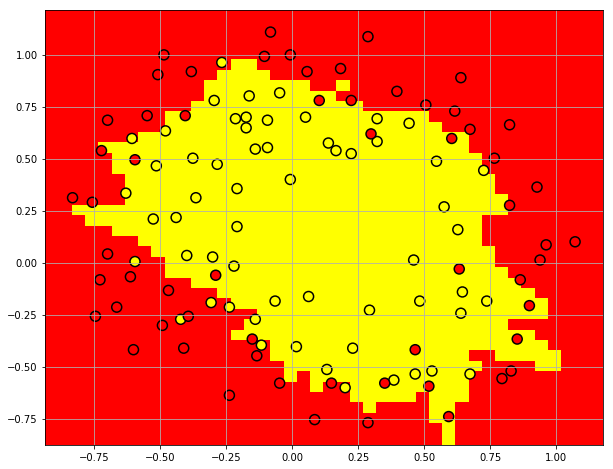

In [31]:
plt.figure(figsize=(10, 8))
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5);
plt.xlim(plot_row.axes.get_xlim())
plt.ylim(plot_row.axes.get_ylim())
plt.grid();